# **Theoretical**

1. What does R-squared represent in a regression model?

R-squared (R²) represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. It indicates how well the regression line fits the data, with values ranging from 0 to 1. A higher R² means a better fit, but does not imply causation.



2. What are the assumptions of linear regression?

Linear regression relies on several key assumptions:

Linearity: The relationship between the independent and dependent variable should be linear.

Independence: Observations should be independent of each other.

Normality of residuals: The residuals (errors) should be normally distributed.

Homoscedasticity: The variance of residuals should be constant across all levels of the independent variable.

No multicollinearity: Independent variables should not be highly correlated with each other.




3. What is the difference between R-squared and Adjusted R-squared?

While R-squared measures the proportion of variance explained by the model, Adjusted R-squared adjusts for the number of predictors in the model. Adjusted R² penalizes the inclusion of unnecessary predictors, making it more reliable for models with multiple variables.



4. Why do we use Mean Squared Error (MSE)?

MSE measures the average squared difference between the actual and predicted values, providing a way to quantify the accuracy of a regression model. Squaring the errors prevents positive and negative errors from canceling each other out and emphasizes larger errors more.



5. What does an Adjusted R-squared value of 0.85 indicate?

An Adjusted R-squared value of 0.85 means that 85% of the variance in the dependent variable is explained by the independent variables, after adjusting for the number of predictors. This suggests a strong model fit while considering the number of variables.



6. How do we check for normality of residuals in linear regression?

Normality of residuals can be checked using:

Histogram or density plot of residuals

Q-Q plot (Quantile-Quantile plot)

Shapiro-Wilk test or Kolmogorov-Smirnov test

Skewness and kurtosis values




7. What is multicollinearity, and how does it impact regression?

Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult to determine the effect of each variable. It increases variance in coefficient estimates, leading to unreliable and unstable models.



8. What is Mean Absolute Error (MAE)?

MAE is the average absolute difference between actual and predicted values. Unlike MSE, it does not square the errors, making it less sensitive to large deviations.



9. What are the benefits of using an ML pipeline?

An ML pipeline automates the workflow of data preprocessing, feature engineering, model training, and evaluation. Benefits include:

Improved efficiency

Reduced risk of errors

Easy reproducibility

Seamless integration of transformations




10. Why is RMSE considered more interpretable than MSE?

RMSE (Root Mean Squared Error) is in the same units as the dependent variable, making it more interpretable than MSE, which is squared.



11. What is pickling in Python, and how is it useful in ML?

Pickling is the process of serializing a Python object into a file for storage and later retrieval. In ML, it allows saving trained models for reuse without retraining.



12. What does a high R-squared value mean?

A high R² suggests that a large proportion of the dependent variable's variance is explained by the model, but it does not necessarily indicate a good model if assumptions are violated.



13. What happens if linear regression assumptions are violated?

Violating assumptions can lead to biased estimates, misleading statistical inferences, and poor predictive performance. Solutions include transforming data or using robust regression methods.



14. How can we address multicollinearity in regression?

Ways to address multicollinearity include:

Removing highly correlated variables

Using Principal Component Analysis (PCA)

Applying Ridge or Lasso regression




15. How can feature selection improve model performance in regression analysis?

Feature selection removes irrelevant or redundant features, reducing overfitting, improving model interpretability, and enhancing computational efficiency.



16. How is Adjusted R-squared calculated?

Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)], where n is the number of observations and k is the number of predictors.



17. Why is MSE sensitive to outliers?

Since MSE squares errors, large deviations have a disproportionately high impact, making it highly sensitive to outliers.



18. What is the role of homoscedasticity in linear regression?

Homoscedasticity ensures that residual variance remains constant across all levels of the independent variable. If violated, heteroscedasticity occurs, leading to biased coefficient estimates.



19. What is Root Mean Squared Error (RMSE)?

RMSE is the square root of MSE, providing an error measure in the same unit as the dependent variable.



20. Why is pickling considered risky?

Pickling is risky due to:

Security vulnerabilities (arbitrary code execution)

Compatibility issues between Python versions

Large file sizes for complex models




21. What alternatives exist to pickling for saving ML models?

Alternatives include:

Joblib (efficient for large NumPy arrays)

ONNX (for cross-platform model deployment)

TensorFlow SavedModel (for deep learning models)




22. What is heteroscedasticity, and why is it a problem?

Heteroscedasticity occurs when residual variance is not constant. It can lead to inefficient and unreliable coefficient estimates in regression models.



23. How can interaction terms enhance a regression model’s predictive power?

Interaction terms capture the combined effect of two independent variables, improving model accuracy by considering relationships that linear models may miss.


# **Practical**

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

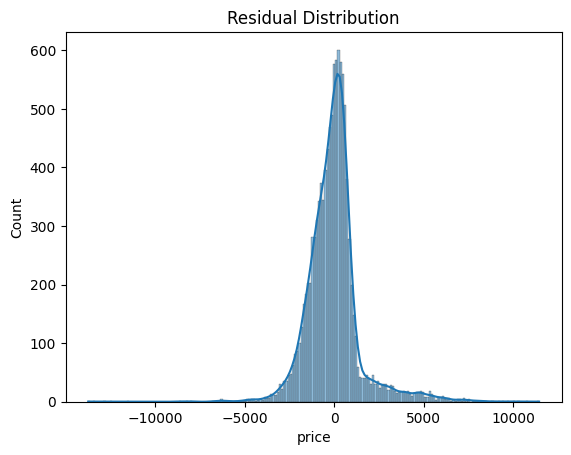

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

# Select features and target variable
X = df[['carat', 'depth', 'table']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()



2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.




In [3]:
from sklearn.metrics import mean_absolute_error

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")




MSE: 2333883.1792799835
MAE: 994.736665092202
RMSE: 1527.7052003838908


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

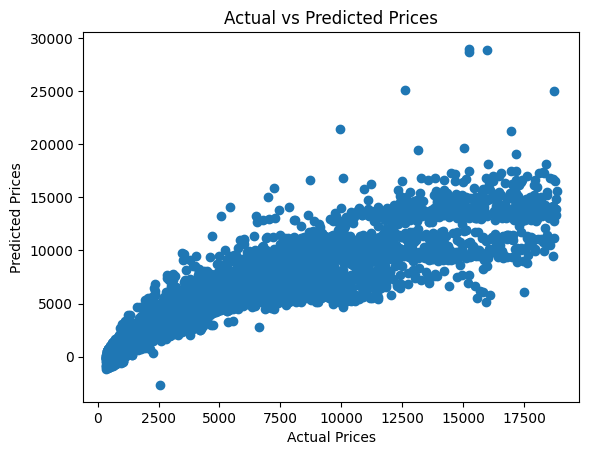

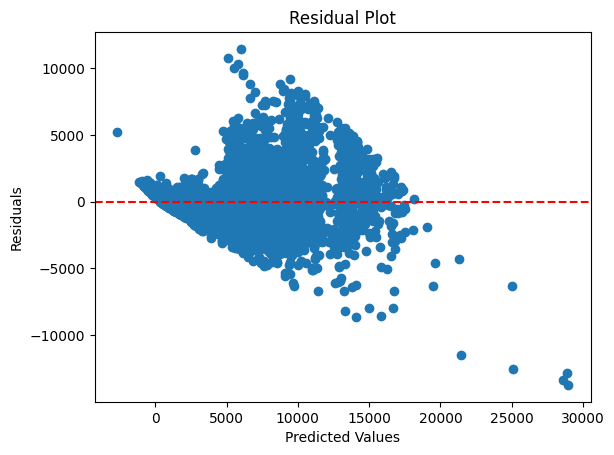

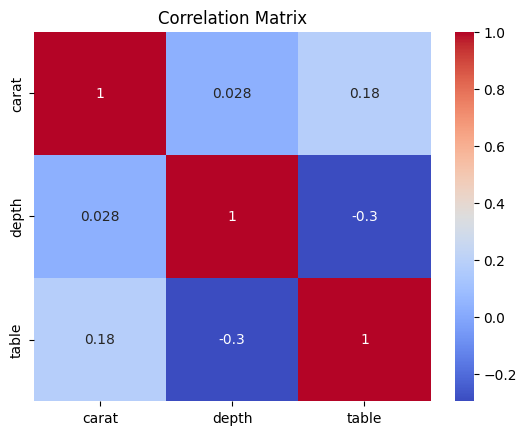

In [4]:
import numpy as np

# Check Linearity
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Check Homoscedasticity (Residual Plot)
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

# Check Multicollinearity
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models




In [8]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {score}")




R-squared Score: 0.8531859226121741


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [9]:
# Print coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared Score: {model.score(X_test, y_test)}")


Intercept: 13056.321710255172
Coefficients: [7873.05329205 -150.40764283 -106.41813265]
R-squared Score: 0.853185544894256


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

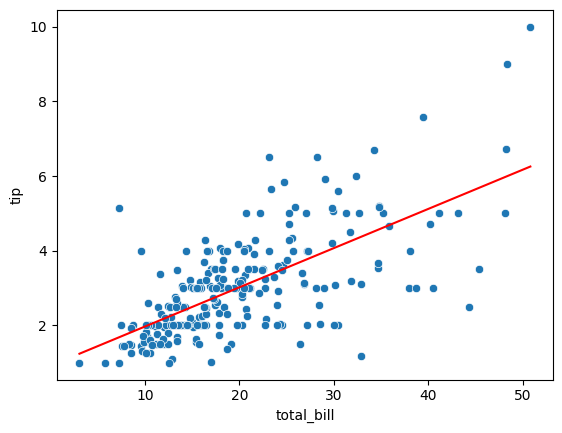

In [10]:
df_tips = sns.load_dataset("tips")

X = df_tips[['total_bill']]
y = df_tips['tip']

# Train model
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
sns.scatterplot(x=X['total_bill'], y=y)
sns.lineplot(x=X['total_bill'], y=y_pred, color='red')
plt.show()




7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.




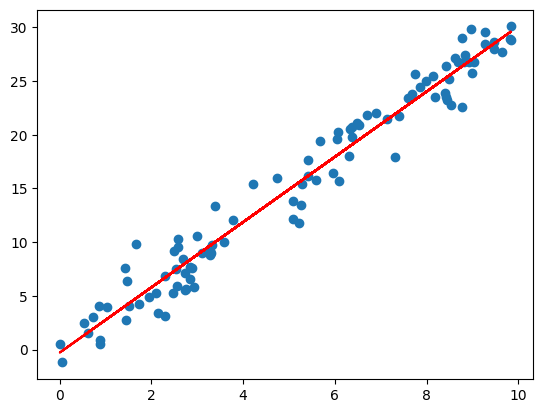

In [11]:
import numpy as np

# Generate data
X_syn = np.random.rand(100, 1) * 10
y_syn = 3 * X_syn + np.random.randn(100, 1) * 2

# Train model
model.fit(X_syn, y_syn)

# Plot data and regression line
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_syn), color='red')
plt.show()

8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [12]:
import pickle

# Save model
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load model
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

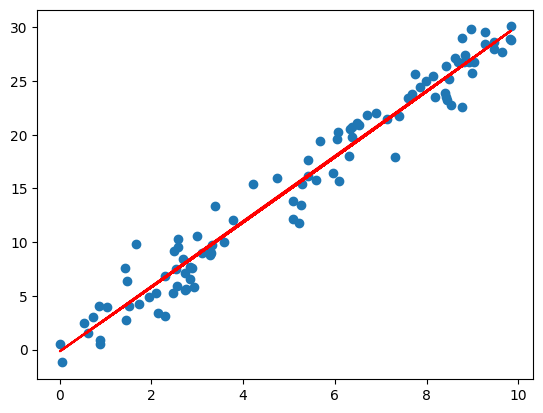

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_syn)

# Train model
model.fit(X_poly, y_syn)

# Plot regression curve
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_poly), color='red')
plt.show()



10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [14]:
X_rand = np.random.rand(100, 1) * 10
y_rand = 5 * X_rand + np.random.randn(100, 1)

model.fit(X_rand, y_rand)
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")



Coefficient: [[5.03014784]], Intercept: [-0.23203019]


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.




In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
X_poly = np.random.rand(100, 1) * 10
y_poly = 4 * X_poly*3 - 2 * X_poly*2 + 3 * X_poly + np.random.randn(100, 1) * 50

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly.fit_transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_transformed, y_poly)
    y_pred_poly = model.predict(X_poly_transformed)

    print(f"Degree {degree} R-squared Score: {r2_score(y_poly, y_pred_poly)}")



Degree 2 R-squared Score: 0.2702310744551637
Degree 3 R-squared Score: 0.27342066753338745
Degree 4 R-squared Score: 0.27674938208292665


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Target': np.random.rand(100) * 10
}

df = pd.DataFrame(data)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared Score: {model.score(X_test, y_test)}")


Intercept: 4.751794571254038
Coefficients: [ 0.83392331 -0.67969298]
R-squared Score: -0.04904311323421173


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

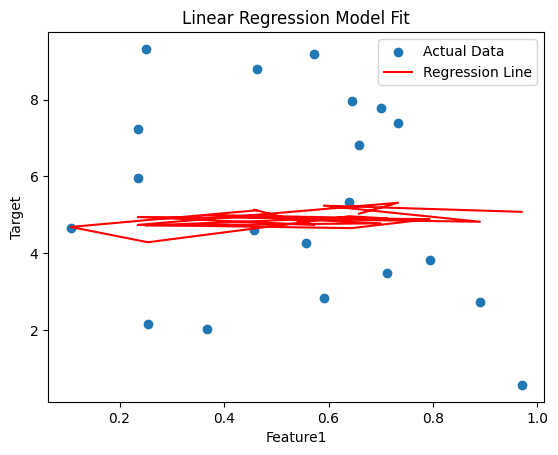

In [22]:
plt.scatter(X_test['Feature1'], y_test, label="Actual Data")
plt.plot(X_test['Feature1'], model.predict(X_test), color='red', label="Regression Line")
plt.legend()
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.title("Linear Regression Model Fit")
plt.show()



14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



    Feature       VIF
0  Feature1  2.682845
1  Feature2  2.682845


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

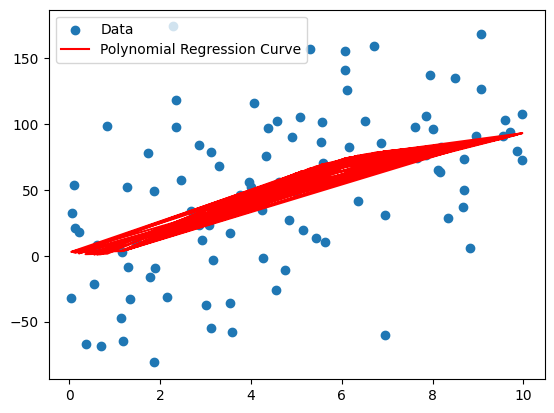

In [24]:
poly = PolynomialFeatures(degree=4)
X_poly_transformed = poly.fit_transform(X_poly)
model.fit(X_poly_transformed, y_poly)

plt.scatter(X_poly, y_poly, label="Data")
plt.plot(X_poly, model.predict(X_poly_transformed), color='red', label="Polynomial Regression Curve")
plt.legend()
plt.show()



16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"R-squared Score: {score}")



R-squared Score: -0.04904311323421173


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

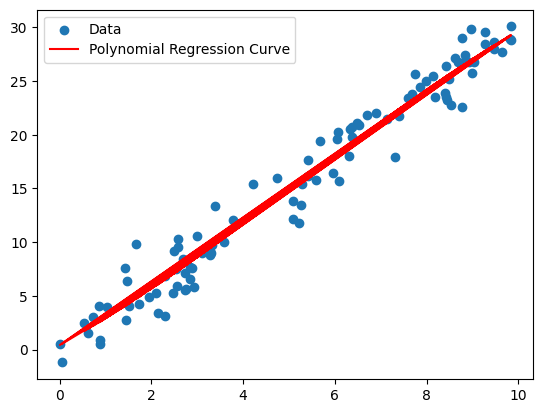

In [26]:
poly = PolynomialFeatures(degree=3)
X_poly_transformed = poly.fit_transform(X_syn)
model.fit(X_poly_transformed, y_syn)

plt.scatter(X_syn, y_syn, label="Data")
plt.plot(X_syn, model.predict(X_poly_transformed), color='red', label="Polynomial Regression Curve")
plt.legend()
plt.show()



18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [27]:
X_multi = np.random.rand(100, 5)
y_multi = 3 * X_multi[:, 0] + 2 * X_multi[:, 1] - X_multi[:, 2] + 4 * X_multi[:, 3] + np.random.randn(100)

model.fit(X_multi, y_multi)
print(f"R-squared Score: {model.score(X_multi, y_multi)}")
print(f"Coefficients: {model.coef_}")



R-squared Score: 0.7124314401816294
Coefficients: [ 3.31740827  2.39960025 -1.42583431  4.0665734   0.20690728]


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

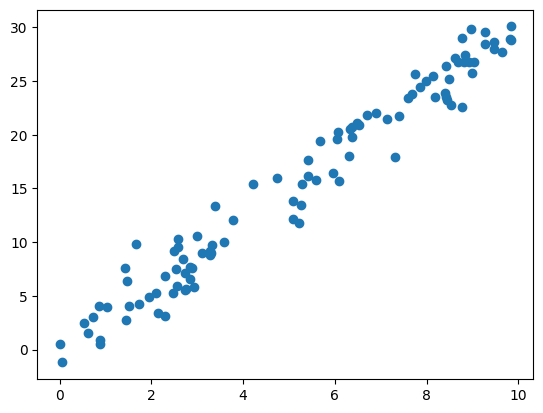

In [28]:
plt.scatter(X_syn, y_syn, label="Data")
plt.plot(X_syn, model.predict(X_syn), color='red', label="Regression Line")
plt.legend()
plt.show()



20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.




In [29]:
X_three = np.random.rand(100, 3)
y_three = 2 * X_three[:, 0] - 3 * X_three[:, 1] + X_three[:, 2] + np.random.randn(100)

model.fit(X_three, y_three)
print(f"R-squared Score: {model.score(X_three, y_three)}")
print(f"Coefficients: {model.coef_}")


R-squared Score: 0.4956551329968164
Coefficients: [ 2.11388472 -3.01084748  0.41180257]


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [30]:
import joblib

# Save model
joblib.dump(model, 'linear_model.joblib')

# Load model
loaded_model = joblib.load('linear_model.joblib')



22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.




In [31]:
df_tips = sns.load_dataset("tips")
df_encoded = pd.get_dummies(df_tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

model.fit(X, y)
print(f"R-squared Score: {model.score(X, y)}")




R-squared Score: 0.47007812322060794


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [34]:
from sklearn.linear_model import Ridge


model.fit(X_train, y_train)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print(f"Linear Regression R²: {model.score(X_test, y_test)}")
print(f"Ridge Regression R²: {ridge.score(X_test, y_test)}")



Linear Regression R²: -0.04904311323421173
Ridge Regression R²: -0.04716963807319163


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.52819606 0.59245311 0.40773384 0.20031853 0.37843167]
Mean CV Score: 0.4214266405944052


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [36]:
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly.fit_transform(X_syn)
    model.fit(X_poly_transformed, y_syn)

    print(f"Degree {degree} R-squared Score: {r2_score(y_syn, model.predict(X_poly_transformed))}")



Degree 1 R-squared Score: 0.9623744801552816
Degree 2 R-squared Score: 0.9623947994568488
Degree 3 R-squared Score: 0.9628117288203775
Degree 4 R-squared Score: 0.9628330271381145
